# Retificador de meia onda (Carga R/L/E)

<center>
<img width="400" height="500" src="Figuras/04_meia_onda_rle.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 110.9598221736478 
Vrms: 	 180.22060040347074
# - Corrente na carga - # 
Ipk: 	 7.975641396689076 
Im: 	 2.7399555431683003 
Irms: 	 4.100044181443627
# - Potências - # 
Ppk:	 1813.9957407738993 
P: 	 341.2370035530643 
S: 	 902.0097199175979
# - Fatores - # 
FP:	 0.37830745724584613 
THD V:	 1.3265203266948424 
THD I:	 1.020618206976411


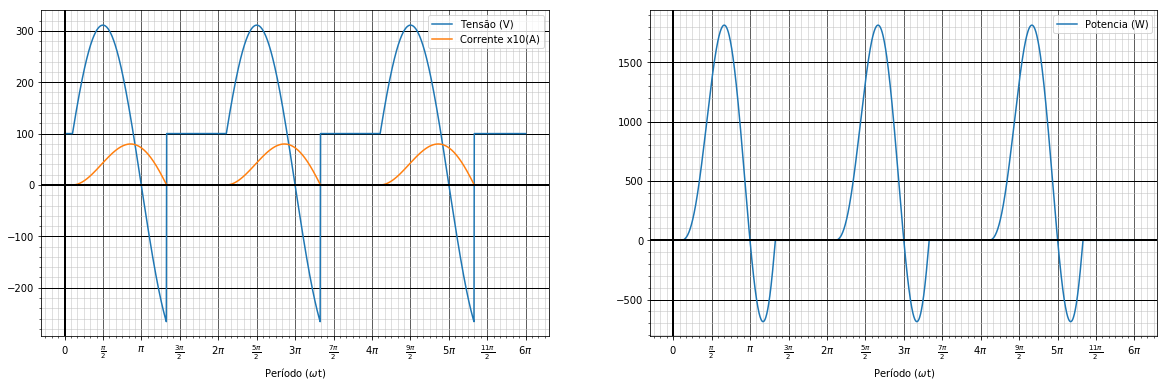

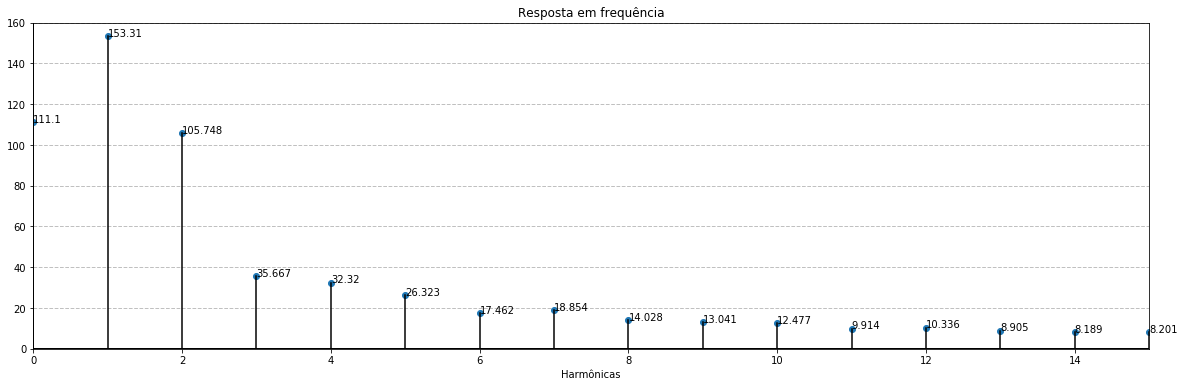

In [2]:
############# RETIFICADOR MEIA ONDA #############
################# CARGA R/L/E ###################
V_pk = 220*sqrt(2)
Freq = 60
R = 4
L = 0.1
E = 100

w = 2*pi*Freq

XL = w * L
#XL = 50

XRL = complex(R,XL)
#XRL = 100 + 30j

Z = abs(XRL)
teta = cm.phase(XRL)
#(r, phi) = polar(z)
tal = L/R

T = 2*pi

ab = calculo_ab(f'{V_pk}*sin(x) - {E}', 0, 'scipy')
#ab = calculo_ab(f'{V_pk}*sin(x)', E)
#a = min(ab).evalf()
a = ab[0]

A = ((-V_pk/Z)*sin(a - teta) + (E/R))*exp(a/(w*tal))

ab = calculo_ab(f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))', pi, 'scipy')
b = ab[0]

func_v = f'{E} + ({V_pk}*sin(x) - {E})*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))'
func_i = func_i + f'*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps})'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_pk/sqrt(2)
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)